#Pra-processsing

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# 1. Load data
df = pd.read_excel("/content/Hasil Kuesioner.xlsx")

print("\nKolom awal dataset:")
print(df.columns)


Kolom awal dataset:
Index(['Tingkat Semester / Tahun Akademik', 'Usia', 'Jenis Kelamin',
       'Berapa rata-rata jam tidur anda per malam?',
       'Apakah anda memiliki kebiasaan merokok?',
       'Jenis minuman kafein yang di komsumsi?',
       'frekuensi  rata-rata konsumsi minuman kafein per hari?',
       'Kategori aktifitas harian anda',
       'Dalam sebulan terakhir, seberapa sering Anda merasa tidak mampu mengendalikan hal-hal penting dalam hidup Anda?',
       'Dalam sebulan terakhir, seberapa sering Anda merasa kesal karena sesuatu yang terjadi secara tidak terduga? ',
       'Dalam sebulan terakhir, seberapa sering Anda merasa gugup dan stress?',
       'Dalam sebulan terakhir, seberapa sering Anda merasa tidak mampu mengatasi semua hal yang harus Anda lakukan?'],
      dtype='object')


In [ ]:
# 2. Preprocessing dasar

# --- Kategorisasi jam tidur ---
def kategori_tidur(jam):
    if jam == "< 5 jam":
        return "Sangat Kurang"
    elif jam == "5-6 jam":
        return "Kurang"
    elif jam == "7-8 jam":
        return "Cukup"
    elif jam == "> 8 jam":
        return "Sangat Cukup"
    else:
        return "Tidak Diketahui" # Handle potential unexpected values

df["Kategori_Tidur"] = df["Berapa rata-rata jam tidur anda per malam?"].apply(kategori_tidur)

# --- Hitung skor stres berdasarkan PSS-4 ---
# Using the actual column names for PSS-4 questions
pss_cols = [
    'Dalam sebulan terakhir, seberapa sering Anda merasa tidak mampu mengendalikan hal-hal penting dalam hidup Anda?',
    'Dalam sebulan terakhir, seberapa sering Anda merasa kesal karena sesuatu yang terjadi secara tidak terduga? ',
    'Dalam sebulan terakhir, seberapa sering Anda merasa gugup dan stress?',
    'Dalam sebulan terakhir, seberapa sering Anda merasa tidak mampu mengatasi semua hal yang harus Anda lakukan?'
]
df["PSS_Score"] = df[pss_cols].sum(axis=1)

def kategori_stres(score):
    if score <= 4:
        return "Rendah"
    elif 5 <= score <= 8:
        return "Sedang"
    else:
        return "Tinggi"

df["Kategori_Stres"] = df["PSS_Score"].apply(kategori_stres)

In [ ]:
# 3. Tampilkan hasil preprocessing

# Tampilkan beberapa kolom utama hasil transformasi
kolom_tampil = [
    "Berapa rata-rata jam tidur anda per malam?",
    "Kategori_Tidur",
    "PSS_Score",
    "Kategori_Stres"
]

print("\n5 data pertama setelah preprocessing:")
print(df[kolom_tampil].head())

# cek distribusi kategori
print("\nDistribusi kategori tidur:")
print(df["Kategori_Tidur"].value_counts())

print("\nDistribusi kategori stres:")
print(df["Kategori_Stres"].value_counts())


5 data pertama setelah preprocessing:
  Berapa rata-rata jam tidur anda per malam? Kategori_Tidur  PSS_Score  \
0  < 5 jam                                    Sangat Kurang  16          
1  5-6 jam                                           Kurang   5          
2  5-6 jam                                           Kurang  12          
3  < 5 jam                                    Sangat Kurang  13          
4  < 5 jam                                    Sangat Kurang   8          

  Kategori_Stres  
0  Tinggi         
1  Sedang         
2  Tinggi         
3  Tinggi         
4  Sedang         

Distribusi kategori tidur:
Kategori_Tidur
Kurang           64
Cukup            40
Sangat Kurang    39
Sangat Cukup      1
Name: count, dtype: int64

Distribusi kategori stres:
Kategori_Stres
Tinggi    70
Sedang    56
Rendah    18
Name: count, dtype: int64


In [ ]:
# 4. Dataset final setelah preprocessing

import pandas as pd

# Pengaturan tampilan agar semua kolom & baris terlihat
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.colheader_justify', 'left')

# Pilih kolom
kolom_final = [
    "Tingkat Semester / Tahun Akademik",
    "Usia",
    "Jenis Kelamin",
    "Kategori_Tidur",   # hasil kategorisasi jam tidur
    "Apakah anda memiliki kebiasaan merokok?",
    "Jenis minuman kafein yang di komsumsi?",
    "frekuensi  rata-rata konsumsi minuman kafein per hari?",
    "Kategori aktifitas harian anda",
    "Kategori_Stres"    # hasil kategorisasi stres
]

# Pastikan hanya kolom yang benar-benar ada yang digunakan
kolom_ada = [k for k in kolom_final if k in df.columns]

print("\nKolom yang digunakan dalam dataset final:")
print(kolom_ada)

# Buat DataFrame final
df_final = df[kolom_ada].copy()

print("\n=== DATASET TERBARU SETELAH PREPROCESSING ===\n")
print(df_final.head())


Kolom yang digunakan dalam dataset final:
['Tingkat Semester / Tahun Akademik', 'Usia', 'Jenis Kelamin', 'Kategori_Tidur', 'Apakah anda memiliki kebiasaan merokok?', 'Jenis minuman kafein yang di komsumsi?', 'frekuensi  rata-rata konsumsi minuman kafein per hari?', 'Kategori aktifitas harian anda', 'Kategori_Stres']

=== DATASET TERBARU SETELAH PREPROCESSING ===

  Tingkat Semester / Tahun Akademik Usia         Jenis Kelamin Kategori_Tidur  \
0  Semester 7-8                      18-20 tahun  Laki-laki     Sangat Kurang   
1  Semester 7-8                      18-20 tahun  Laki-laki            Kurang   
2  Semester 7-8                      21-23 tahun  Perempuan            Kurang   
3  Semester 7-8                      21-23 tahun  Perempuan     Sangat Kurang   
4  Semester 7-8                      18-20 tahun  Perempuan     Sangat Kurang   

  Apakah anda memiliki kebiasaan merokok?  \
0     Ya                                    
1     Ya                                    
2  Tidak   

In [ ]:
# 5. Penomoran variabel independen dan target

# Tetapkan variabel target (dependen)
target_col = "Kategori_Tidur"

# Gunakan nama kolom sesuai dataset final (selain target)
variabel_asli = [
    "Tingkat Semester / Tahun Akademik",
    "Usia",
    "Jenis Kelamin",
    "Apakah anda memiliki kebiasaan merokok?",
    "Jenis minuman kafein yang di komsumsi?",
    "frekuensi  rata-rata konsumsi minuman kafein per hari?",
    "Kategori aktifitas harian anda",
    "Kategori_Stres"
]

# Buat mapping nama kolom -> x1, x2, dst
rename_dict = {col: f"x{i+1}" for i, col in enumerate(variabel_asli)}

# Rename hanya variabel independen (biarkan target tetap "y")
df_final.rename(columns=rename_dict, inplace=True)
df_final.rename(columns={target_col: "y"}, inplace=True)

print("\n=== Daftar variabel setelah diubah ===")
print("y  →", target_col)
for asli, baru in rename_dict.items():
    print(f"{baru} → {asli}")

print("\n5 baris pertama setelah penomoran variabel:")
print(df_final.head())


=== Daftar variabel setelah diubah ===
y  → Kategori_Tidur
x1 → Tingkat Semester / Tahun Akademik
x2 → Usia
x3 → Jenis Kelamin
x4 → Apakah anda memiliki kebiasaan merokok?
x5 → Jenis minuman kafein yang di komsumsi?
x6 → frekuensi  rata-rata konsumsi minuman kafein per hari?
x7 → Kategori aktifitas harian anda
x8 → Kategori_Stres

5 baris pertama setelah penomoran variabel:
  x1            x2           x3         y              x4     x5    x6      \
0  Semester 7-8  18-20 tahun  Laki-laki  Sangat Kurang     Ya  Kopi  2 Cup   
1  Semester 7-8  18-20 tahun  Laki-laki         Kurang     Ya  Kopi  3 Cup   
2  Semester 7-8  21-23 tahun  Perempuan         Kurang  Tidak  Kopi  1 Cup   
3  Semester 7-8  21-23 tahun  Perempuan  Sangat Kurang  Tidak  Kopi  2 Cup   
4  Semester 7-8  18-20 tahun  Perempuan  Sangat Kurang  Tidak  Kopi  1 Cup   

  x7                                       x8       
0          Sedentari  (<5000 langkah/hari)  Tinggi  
1  Cukup aktif  (5000 - 9999 langkah/hari)  Sed

In [ ]:
# 6. Encoding variabel kategorikal menjadi numerik

import pandas as pd
import numpy as np

# Buat salinan data agar aman
df_encoded = df_final.copy()

# --- Label Encoding untuk variabel ordinal ---

# Kategori Tidur (target)
map_tidur = {"Sangat Kurang": 1, "Kurang": 2, "Cukup": 3, "Sangat Cukup": 4}
df_encoded["y"] = df_encoded["y"].map(map_tidur)

# Semester (x1)
map_semester = {
    "Semester 1-2": 1,
    "Semester 3-4": 2,
    "Semester 5-6": 3,
    "Semester 7-8": 4,
    ">Semester 8": 5,
}
df_encoded["x1"] = df_encoded["x1"].map(map_semester)

# Usia (x2)
map_usia = {
    "<18 tahun": 1,
    "18-20 tahun": 2,
    "21-23 tahun": 3,
    ">23 tahun": 4
}
df_encoded["x2"] = df_encoded["x2"].map(map_usia)

# Kategori Stres
map_stres = {"Rendah": 1, "Sedang": 2, "Tinggi": 3}
df_encoded["x8"] = df_encoded["x8"].map(map_stres)

# Kategori Aktivitas Harian (versi fleksibel)
def map_aktivitas_flexible(val):
    if pd.isna(val):
        return np.nan
    val = val.lower().strip()
    if "sedentari" in val:
        return 1
    elif "cukup aktif" in val:
        return 2
    elif "aktif" in val:
        return 3
    else:
        return np.nan

df_encoded["x7"] = df_encoded["x7"].apply(map_aktivitas_flexible)

# Ubah x6 ("1 Cup", "2 Cup", "3 Cup") jadi angka
df_encoded["x6"] = df_encoded["x6"].astype(str).str.extract('(\d+)').astype(float)

# --- One-hot encoding untuk variabel nominal lainnya ---
# (Jenis Kelamin, Jenis Minuman, Merokok, dsb.)
df_encoded = pd.get_dummies(df_encoded, columns=["x3", "x4", "x5"], drop_first=True)

print("\n=== Data setelah encoding (5 baris pertama) ===")
print(df_encoded.head())


=== Data setelah encoding (5 baris pertama) ===
   x1  x2  y  x6   x7  x8  x3_Perempuan  x4_Ya  \
0  4   2   1  2.0  1   3   False          True   
1  4   2   2  3.0  2   2   False          True   
2  4   3   2  1.0  1   3    True         False   
3  4   3   1  2.0  1   3    True         False   
4  4   2   1  1.0  2   2    True         False   

   x5_Minuman Berenergi (Red Bull/ Kratingdaeng/Kukubima/dll)  \
0  False                                                        
1  False                                                        
2  False                                                        
3  False                                                        
4  False                                                        

   x5_Minuman Berenergi (Red Bull/ Kratingdaeng/Kukubima/dll) (Red Bull/ Kratingdaeng/Kukubima/dll)  \
0  False                                                                                              
1  False                                             

<>:57: SyntaxWarning: invalid escape sequence '\d'
<>:57: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3614649035.py:57: SyntaxWarning: invalid escape sequence '\d'
  df_encoded["x6"] = df_encoded["x6"].astype(str).str.extract('(\d+)').astype(float)


# Visualisasi Distribusi Data Responden Pada Beberapa Variabel

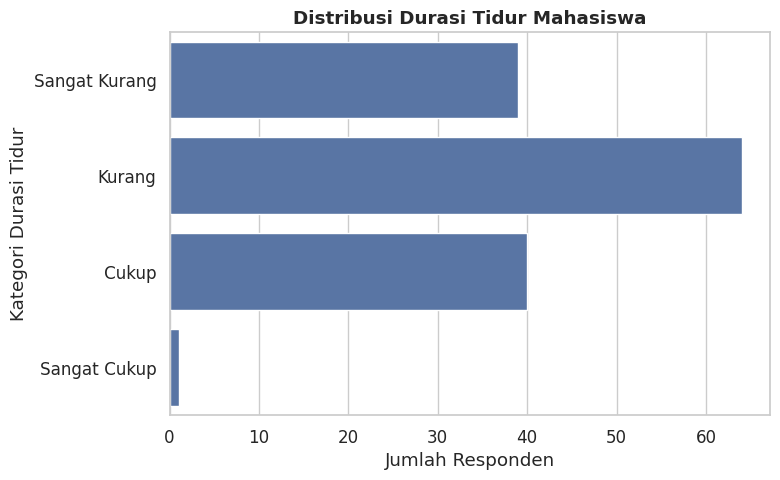

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)

order_tidur = ["Sangat Kurang", "Kurang", "Cukup", "Sangat Cukup"]

plt.figure(figsize=(8, 5))
sns.countplot(
    data=df_final,
    y="Kategori_Tidur",
    order=order_tidur
)

plt.title("Distribusi Durasi Tidur Mahasiswa", weight="bold")
plt.xlabel("Jumlah Responden")
plt.ylabel("Kategori Durasi Tidur")
plt.tight_layout()
plt.show()

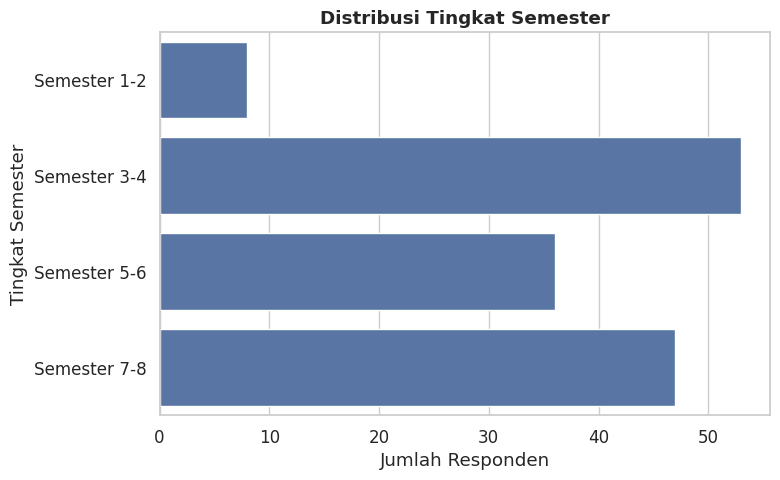

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df_final,
    y="Tingkat Semester / Tahun Akademik",
    order=["Semester 1-2", "Semester 3-4", "Semester 5-6", "Semester 7-8"]
)

plt.title("Distribusi Tingkat Semester", weight="bold")
plt.xlabel("Jumlah Responden")
plt.ylabel("Tingkat Semester")
plt.tight_layout()
plt.show()



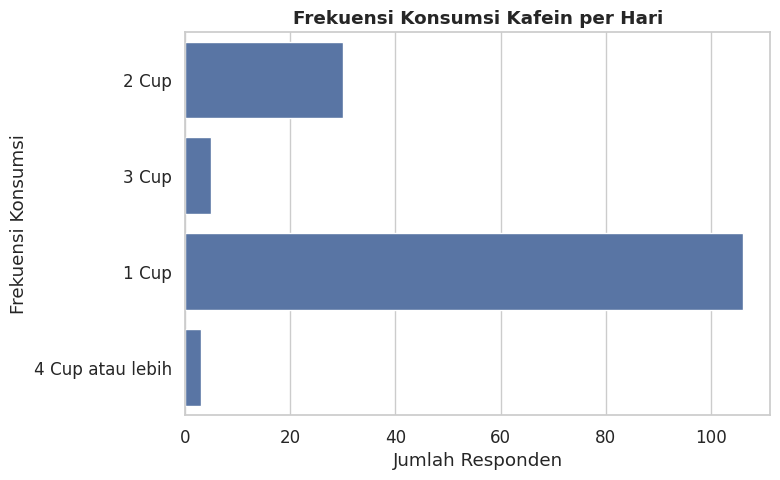

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df_final,
    y="frekuensi  rata-rata konsumsi minuman kafein per hari?"
)

plt.title("Frekuensi Konsumsi Kafein per Hari", weight="bold")
plt.xlabel("Jumlah Responden")
plt.ylabel("Frekuensi Konsumsi")
plt.tight_layout()
plt.show()


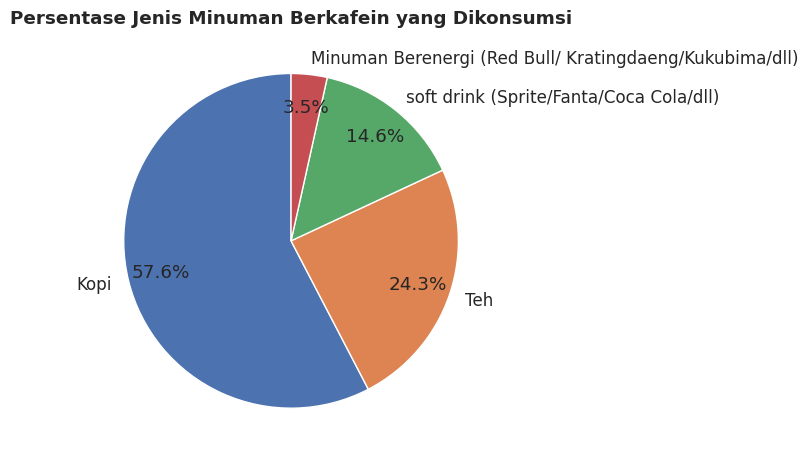

In [ ]:
import matplotlib.pyplot as plt
df_final["Jenis_Minuman_Kafein"] = df_final["Jenis minuman kafein yang di komsumsi?"].replace({
    "Minuman Berenergi (Red Bull/ Kratingdaeng/Kukubima/dll)": "Minuman Berenergi",
    "soft drink (Sprite/Fanta/Coca Cola/dll)": "Soft Drink"
})

# Hitung jumlah tiap kategori
data_pie = df_final["Jenis minuman kafein yang di komsumsi?"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(
    data_pie,
    labels=data_pie.index,
    autopct='%1.1f%%',   # tampilkan persen
    startangle=90,
    pctdistance=0.8
)

plt.title("Persentase Jenis Minuman Berkafein yang Dikonsumsi", weight="bold")
plt.tight_layout()
plt.show()


# Regresi Ordinal Logistik

## Summary model

In [ ]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
import pandas as pd

# Ambil variabel yang diperlukan
X = df_encoded[["x1", "x2", "x3_Perempuan", "x4_Ya", "x5_Teh", "x5_soft drink (Sprite/Fanta/Coca Cola/dll)",
                "x5_Minuman Berenergi (Red Bull/ Kratingdaeng/Kukubima/dll)","x6","x7", "x8"]]
y = df_encoded["y"]             # variabel dependen

# Pastikan kolom boolean diubah menjadi integer (0 atau 1)
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

# Buat model
model = OrderedModel(y, X, distr="logit")

# Fitting model
result = model.fit(method="bfgs")

# Output hasil
print(result.summary())

/tmp/ipython-input-1808504599.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(int)
/tmp/ipython-input-1808504599.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(int)
/tmp/ipython-input-1808504599.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

Optimization terminated successfully.
         Current function value: 0.804296
         Iterations: 67
         Function evaluations: 69
         Gradient evaluations: 69
                             OrderedModel Results                             
Dep. Variable:                      y   Log-Likelihood:                -115.82
Model:                   OrderedModel   AIC:                             257.6
Method:            Maximum Likelihood   BIC:                             296.2
Date:                Fri, 21 Nov 2025                                         
Time:                        11:27:58                                         
No. Observations:                 144                                         
Df Residuals:                     131                                         
Df Model:                          10                                         
                                                                 coef    std err          z      P>|z|      [0.025   

## Odds Ratio (OR)

In [ ]:
import numpy as np
import pandas as pd

# Ambil koefisien dan CI dari model
params = res_ord.params
conf = res_ord.conf_int()
conf.columns = ["2.5%", "97.5%"]

# Hitung Odds Ratio
odds_ratio = np.exp(params)

# Hitung CI OR
or_ci_lower = np.exp(conf["2.5%"])
or_ci_upper = np.exp(conf["97.5%"])

# Gabungkan ke tabel
tabel_or = pd.DataFrame({
    "Coef": params,
    "Odds Ratio": odds_ratio,
    "OR 2.5%": or_ci_lower,
    "OR 97.5%": or_ci_upper
})

print("\n=== Tabel Odds Ratio (OR) ===")
print(tabel_or)


=== Tabel Odds Ratio (OR) ===
                                                    Coef      Odds Ratio  \
x1                                                 -1.364377    0.255540   
x2                                                  0.450614    1.569275   
x6                                                 -0.795958    0.451149   
x7                                                  0.758733    2.135568   
x8                                                 -0.329844    0.719036   
x3_Perempuan                                       -0.145783    0.864345   
x4_Ya                                               0.072332    1.075013   
x5_Minuman Berenergi (Red Bull/ Kratingdaeng/Ku...  5.607029  272.333830   
x5_Minuman Berenergi (Red Bull/ Kratingdaeng/Ku...  6.153965  470.579357   
x5_Teh                                              3.092483   22.031711   
x5_soft drink (Sprite/Fanta/Coca Cola/dll)          2.328071   10.258134   
x5_soft drink (Sprite/Fanta/Coca Cola/dll) (Spr...  3.897